In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
data=pd.read_csv('playstore-analysis.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1. Data clean up - Missing Value Treatement
a) Drop records where rating is missing since rating is our target/study variable

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# .
Here we can clearly see that in column rating 1474 values are missing. Also missing values in
various column as below: Type 1 Content Rating 1 Current Ver 8 Android Ver 3 So as per requirement
    we drop missing values in Rating column

In [6]:
data1=data.dropna(subset=['Rating'])
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [8]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

# .
Check the null values for the Android Ver column.

In [9]:
data1.isnull().sum()['Android Ver']

3

In [10]:
(data1[data1.isna().any(axis=1)])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
print(data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

# .
Values are as below: 4453 Personalization july 20, 2018 4.4 Nan 4490 Personalization march
    27, 2018 1.1 NaN 10472 February 11, 2018 1.0.19 4.0 and up NaN

In [12]:
data2=data1.drop(10472)

In [13]:
data2 = data1.drop(10472)
#verification
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


# .
So here we successfully drop 'Life Made Wi-Fi Touchscreen Photo Frame'  as in output we
found an empty dataframe.

iii. Replace remaining missing values with the mode.

In [14]:
import statistics
Android_list = data2['Android Ver'].to_list()
#print(Android_list)
#O/P ['4.2 and up', '1.5 and up', non, non, '4.0 and up', '4.0 and up']

#Did Manual wok (illegal)
Al= [4.2,1.5,4.0,4.0]
#print(AL)
#print(statistrics.mode(AL)
data2_new = data2.fillna(statistics.mode(Al))
print(data2_new.loc[[4453]])
print('--------------------------------------------------------')
print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


# .
Now Android ver is 4 for Category 'PERSONALIZATION'

.
Current ver-replace with most common value

In [15]:
data2_new['Current Ver'].isnull().sum()

0

# .
No missing value is observed in 'Current Ver'

# 2. Data Clean Up - Corecting the data types
a. Which all variables need to be brought to numeric types?

In [16]:
type(data2_new['Reviews'])
type(data2_new['Size'])
type(data2_new['Last Updated'])

pandas.core.series.Series

# .
Conversion of series to numerical integers

In [17]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

# . 
Price variable - remove $ sign and convert to float

In [18]:
data2_new['Price'] = data2_new['Price'].str.replace('$', '')
data2_new.head()

C:\Users\abhij\AppData\Local\Temp/ipykernel_5812/1876605766.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2_new['Price'] = data2_new['Price'].str.replace('$', '')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# .
$ Symbol successfully removed from Price column.

In [19]:
data2_new['Price']=data2_new['Price'].astype(float)

In [20]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


# .
Here we converted various column attributes in as following data type:
1. 2 Rating 9366 non-null float64
2. 3 Reviews 9366 non-null int32
3. 4 Size 9366 non-null float64
4. 7 Price 9366 non-null float64
5. 10 Last Updated 9366 non-null datetime64[ns]

c. Installs - remove','and'+'sign, convert to integer

In [21]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+', '')
data2_new['Installs'] = data2_new['Installs'].str.replace(',', '')
data2_new['Installs'] = data2_new['Installs'].astype(int)

C:\Users\abhij\AppData\Local\Temp/ipykernel_5812/2418046981.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2_new['Installs'] = data2_new['Installs'].str.replace('+', '')


In [22]:
data2_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [23]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


# .
Successfully removed +and, sign from colmn installs as well as change datatype to int as per requirement

# 3. Sanity checks - check for the following and handle accodingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [24]:
pd.unique(data2_new[['Rating']].values.ravel())
#.Ravel(--> return 1D array with all the input-arrat elements)

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# .
Yes all Avg. rating values is in between 1 and 5 i. Are there any such records? Drop if so.-->
No such record has been observed.

.
b. Reviews should not be more than installs as only those who installed can review the app.

In [25]:
df=pd.DataFrame()
df=data2_new[data2_new.Reviews <= data2_new.Installs]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [26]:
df.shape

(9359, 13)

# As
    percondition we got 9359 rows of data.

# 4. Identify and hangle outliers -
    
    a. Price column
    
    1. Make suitable plot to identify outlies in price

C:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


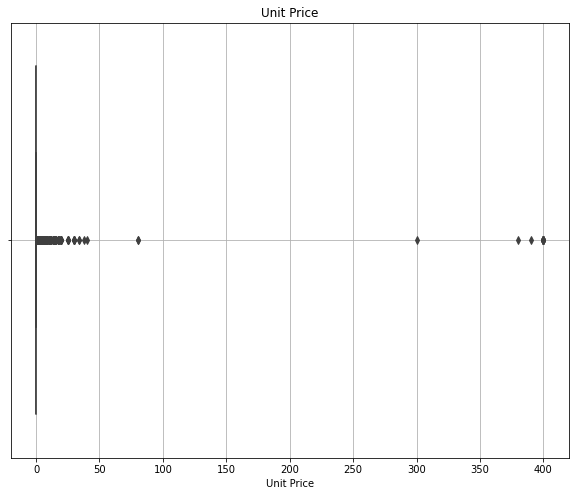

In [27]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

# As 
Using above boxplot we can observe the outliers in price column

ii. Do you expect apps on the play store to cost $200? check out these cases

In [28]:
rslt_df = data2_new[data2_new['Price']==200]
print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [29]:
rslt_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# in
original dataframe there is a row of app $200 but if you see rating column is blank
and previously we drop data whose rating value is null. Hence in new data frame we got Empty DataFrame

iii. After dropping the useless records, make the suitable plot again identify outlires --> To fullfill above condition let's remove whose price values is 0.

In [30]:
useful_df=df[df['Price'] !=0]
useful_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up


C:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


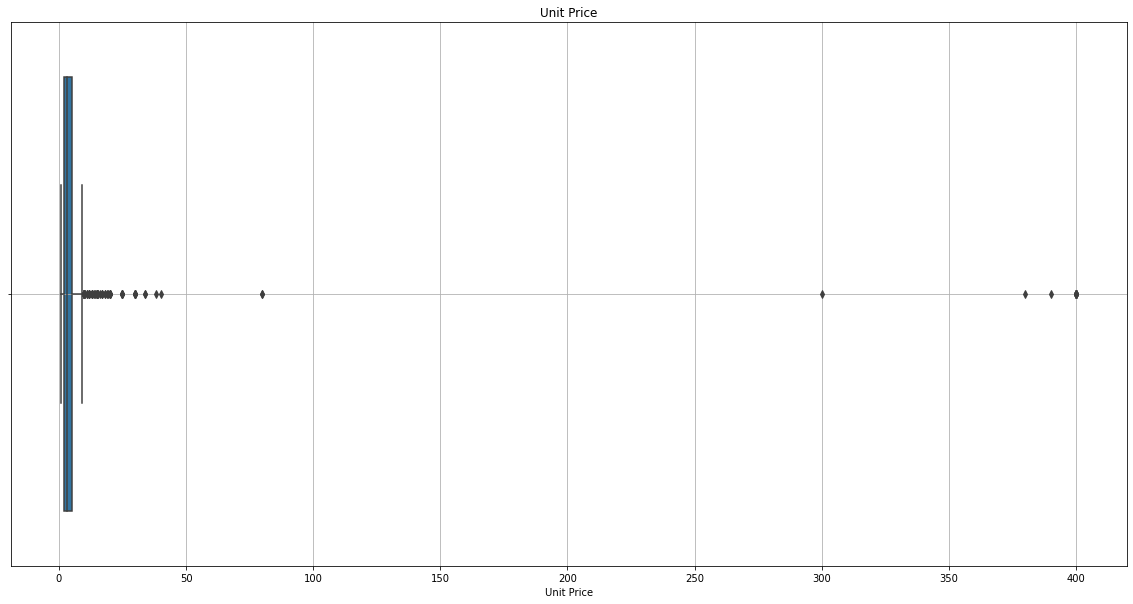

In [31]:
plt.subplots(figsize=(20,10))
sns.boxplot(useful_df['Price'])
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

# iv. Limit data to records with price < $ 30

In [32]:
limit_data=df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [33]:
limit_data.shape

(9338, 13)

# As per condition we got data of row 9338

b. Reviews colun

i. Make suitable plot 

In [34]:
Category=df.groupby('Category')
Category

In [35]:
total=Category['Reviews'].sum().sort_values()
total

Category
EVENTS                     160590
BEAUTY                     395133
PARENTING                  953609
LIBRARIES_AND_DEMO        1033535
AUTO_AND_VEHICLES         1163630
MEDICAL                   1585618
ART_AND_DESIGN            1714372
COMICS                    3381945
HOUSE_AND_HOME            3976004
DATING                    7291039
FOOD_AND_DRINK            8883009
LIFESTYLE                12871520
BUSINESS                 13954086
WEATHER                  14604695
FINANCE                  17550406
BOOKS_AND_REFERENCE      21958660
MAPS_AND_NAVIGATION      30659060
HEALTH_AND_FITNESS       37893622
EDUCATION                39595010
NEWS_AND_MAGAZINES       54399899
ENTERTAINMENT            59178154
TRAVEL_AND_LOCAL         62617772
SPORTS                   70829568
PERSONALIZATION          89345815
VIDEO_PLAYERS           110379692
PRODUCTIVITY            114116717
SHOPPING                115041033
PHOTOGRAPHY             213516607
TOOLS                   273184168
FAMIL

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

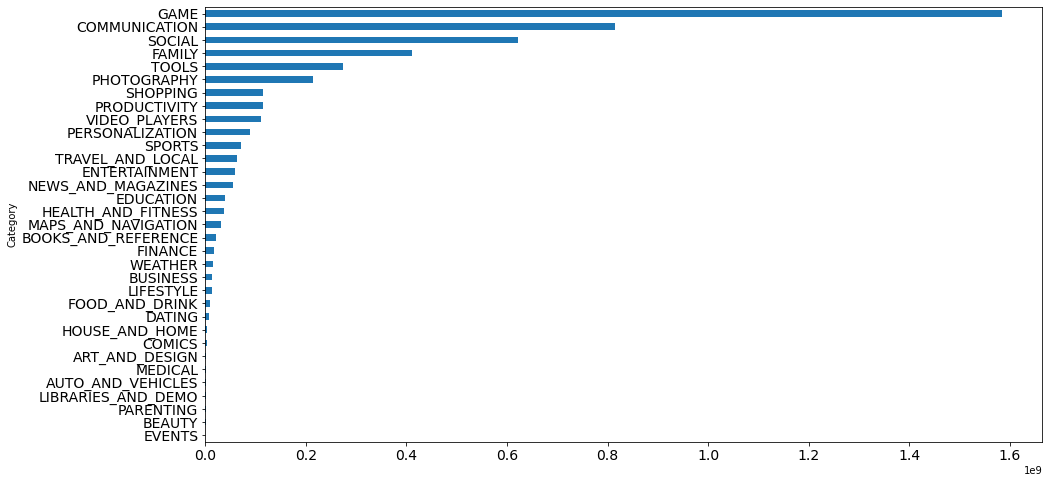

In [36]:
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

# Top 5 reviewed Apps by Category
1. GAME 1585419555
2. Communication 815461799
3. Social 621241071
4. Family 410223081
5. Tools 273184168

ii. Limt data on apps with < 1 million reviews

In [37]:
limit_data_by_reviews = df[df['Reviews'] < 1000000]
limit_data_by_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [38]:
limit_data_by_reviews.shape

(8655, 13)

# We found 8655 rows of limited data to app with <1 million reviews

c. Installs

i. What is the 95 the percentile of the install?

In [39]:
val = df['Installs'].quantile(0.95)
val

100000000.0

# 95th Percentile of the install os 100000000.0

ii. Drop records having a value more than the 95th percentile

In [40]:
#verification
x = df['Installs'].quantile() > val
x

False

# There is no value more than the 95th percentile.

# Data Analysis to answer business questions
1. What is the disribution of rating like ? (use Seaborn) More skewed towards higher/lower values?

C:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

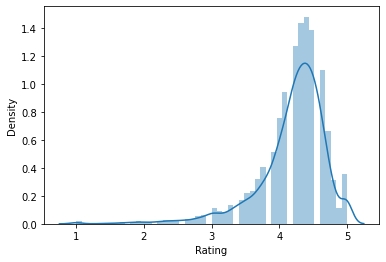

In [41]:
sns.distplot(df['Rating'])
plt.show

# 1. A left Skewed distributon is sometimes called a negatively skewed distribution because it's long tail is on the negative direction on a number line. The mean is also on the left of the peak
2. Here you can see three measured position on the plot. SO, you will find that: mean less than 
    the mode median less than the mode mean less than median here he distribution tells that most
    of the rating is in between 4 to 5.
b. What is the implication of this on yours analysis?

Ans = Real life distributions are usually skewed. if there are too much skewnedd in the data, then
many statistical model don't work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outlier adversely affect the model's performance especially
regression-based models so there is a necessity to transform the skewed data to close enough
to a gaussin distribution or Normal distribution. This will aloow us to try more number of
statistical model. 

Conclusion : if we have a skewed data then it may harm our results. So, in order to use a skewed
    data we have to apply a log transformation over the whole set of values to discover 
    pattern in the data and make it usable for the statistical model.

1. What are the top Content Rating values?
    

In [42]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# Top Content Rating values : Content Rating Everyone 7414
    Teen 1083
    Mature 17+461
    Everyoneryone 10+397
    Adults Only 18+3
    Unrated 1
a. Are there any values with very few records?

Yes, 'Unrated' Content Rating has value 1 and Adults only 18+-->3

In [43]:
adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated = df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(adult_rating,inplace=True)
df.drop(unrated,inplace=True)
df['Content Rating'].value_counts()

C:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# Effect of size on rating
a. Make a jointplot to understant the effect of size on rating

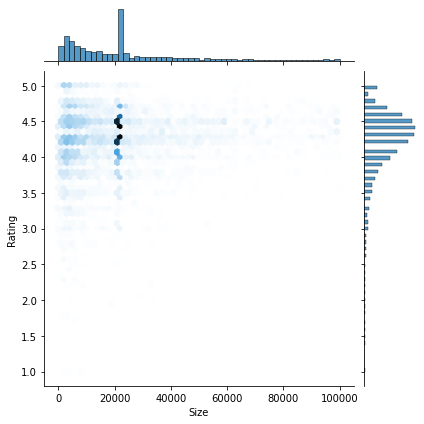

In [44]:
sns.jointplot(x=df['Size'], y=df['Rating'], data=df, kind='hex')
plt.show()

# b. DO you see any patterns?
c. How do you explain the pattern?

Ans = We observed that the maximum data oint gather in between Rating 4.0-4.5 and size 0-40000 (40 mb). Meaning is that the 
application size which is in between 0-40000(40mb) get good rating on play store
Effect of price on rating a. Make a jointplot (with regression line)

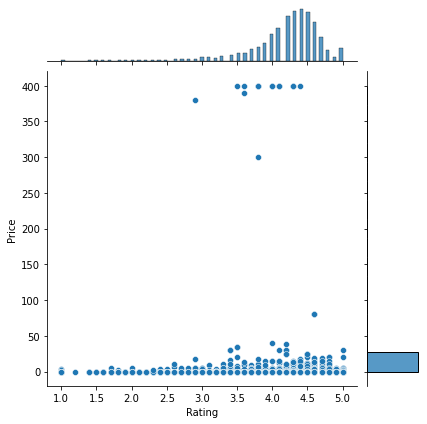

In [45]:
sns.jointplot(x='Rating', y='Price', data=df)

# b. What pattern do you see?

c.How do you eplain the pattern?

increasing the price, Rating Increases

d.Replot the data, this time with only records with price > 0

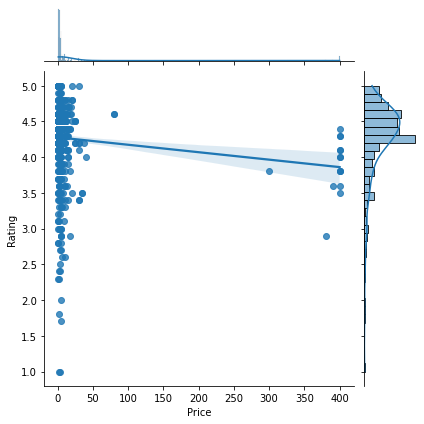

In [46]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x = "Price", y="Rating", data = Price_greaterthan_zero, kind = "reg")

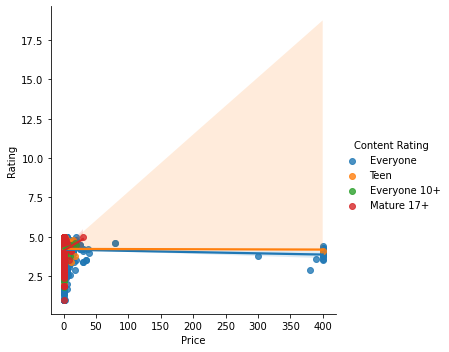

In [47]:
sns.lmplot(x='Price', y='Rating', hue='Content Rating', data=df)

# Mature and Teen are more posively co-related in content rating than 10+ and everyone
     * Look at all the numeric interactions together-

# a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

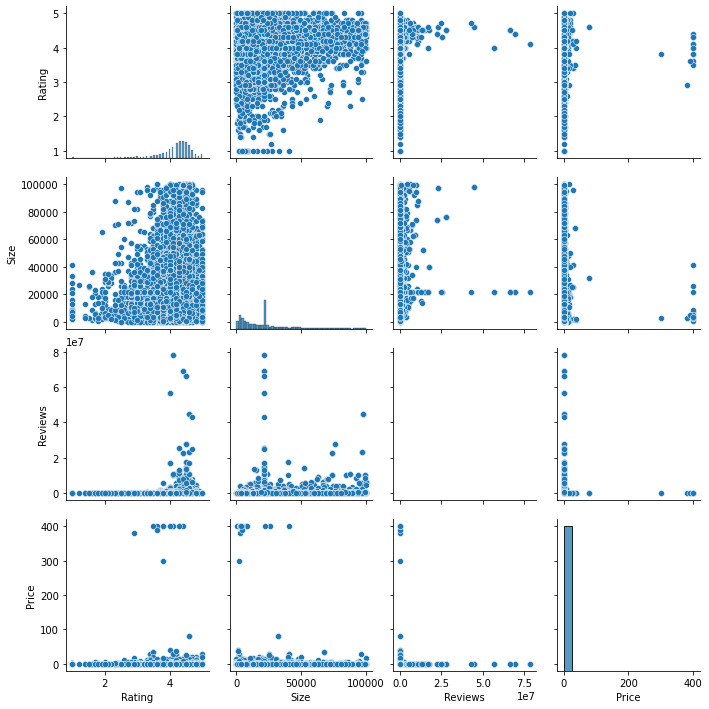

In [48]:
sns.pairplot(data=df, vars=['Rating', 'Size', 'Reviews', 'Price'])

In [49]:
This is the basic exploratory analysis to look for any evident patterns or relationships between the features.

SyntaxError: invalid syntax (Temp/ipykernel_5812/3208270438.py, line 1)

# Rating vs. Content rating
1. Make a bar plot displaying the rating for each content rating

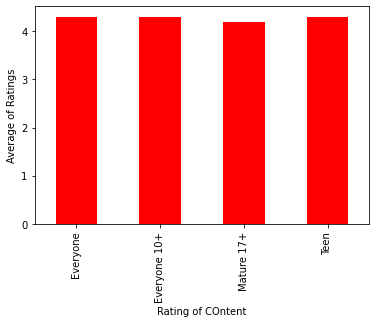

In [50]:
a= df['Rating'].groupby(df['Content Rating']).median().plot (kind = 'bar', color='r')
a.set(xlabel = 'Rating of COntent', ylabel = 'Average of Ratings')
plt.show()

# b. Which metric would you use? mean? Median? Some other quantile?

c. Choose the right metric and plot

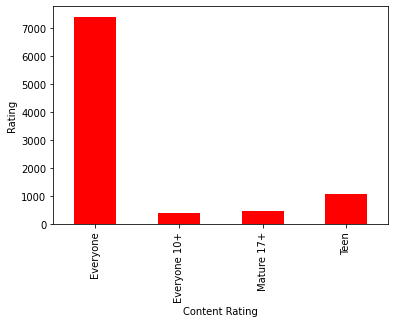

In [51]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color='r')
plt.ylabel('Rating')
plt.show()

# Content Rating vs. Size vs. Rating - 3 Variables at a time
a. Create 5 Buckets (20% records in each) based on size

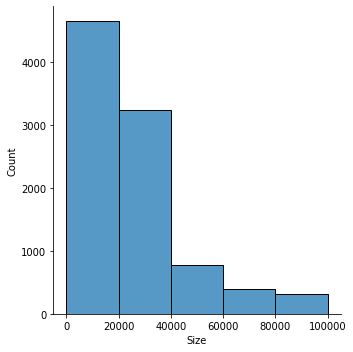

In [52]:
#Checking skewness
sns.displot(df["Size"], bins=5)

In [53]:
bins= [0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
pd.pivot_table(df, values= 'Rating', index='Size_Buckets', columns='Content Rating')

C:\Users\abhij\AppData\Local\Temp/ipykernel_5812/3244253955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
Very Low,4.116056,4.188889,3.951429,4.224490
Low,4.161317,4.207143,4.129592,4.209655
Medium,4.242463,4.262602,4.091975,4.205630
High,4.179122,4.209375,4.168333,4.213158
Very High,4.208134,4.287805,4.197170,4.279603


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [54]:
df.Size.quantile([0.2, 0.4, 0.6, 0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [55]:
df.Rating.quantile([0.2, 0.4, 0.6, 0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

# c. Make a heatmap of this

i. Annotated

ii. Green color map

In [56]:
Size_Buckets = pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')
aggfunc=lambda x:np.quantile(x,0.2)
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
Very Low,4.116056,4.188889,3.951429,4.224490
Low,4.161317,4.207143,4.129592,4.209655
Medium,4.242463,4.262602,4.091975,4.205630
High,4.179122,4.209375,4.168333,4.213158
Very High,4.208134,4.287805,4.197170,4.279603


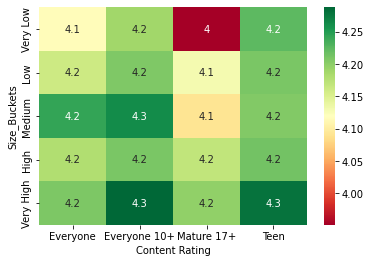

In [57]:
sns.heatmap(Size_Buckets, cmap='RdYlGn', annot = True)
plt.show()

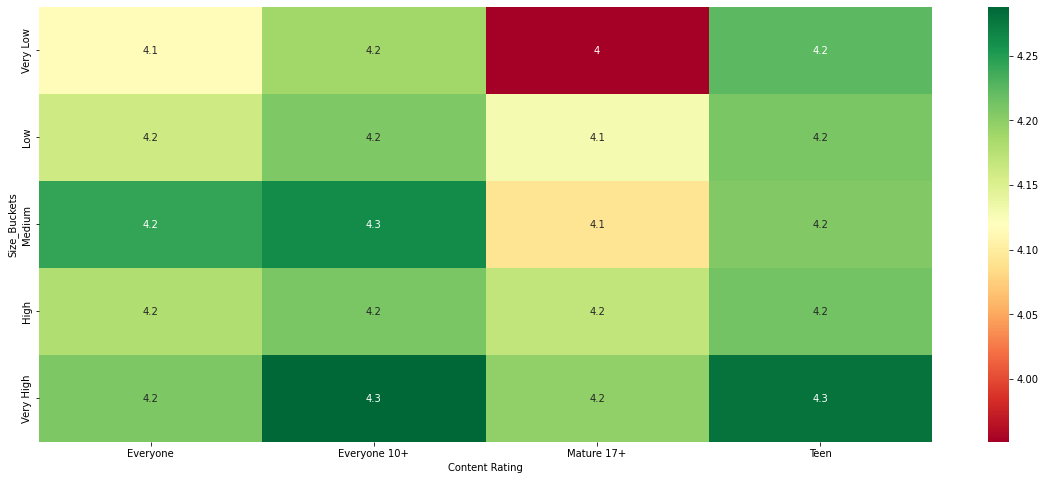

In [58]:
fig=plt.figure(figsize=(20,8))

sns.heatmap(Size_Buckets, cmap='RdYlGn', annot=True)
plt.show()

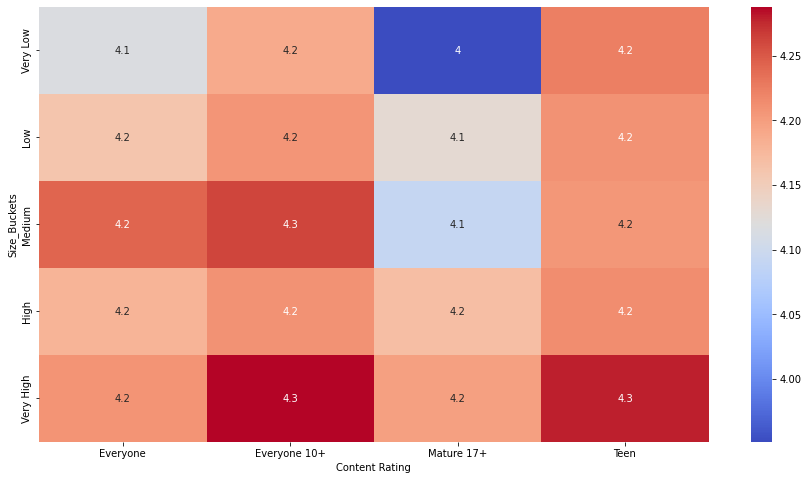

In [59]:
fig=plt.figure(figsize=(15,8))

sns.heatmap(Size_Buckets, cmap='coolwarm', annot=True)
plt.show()

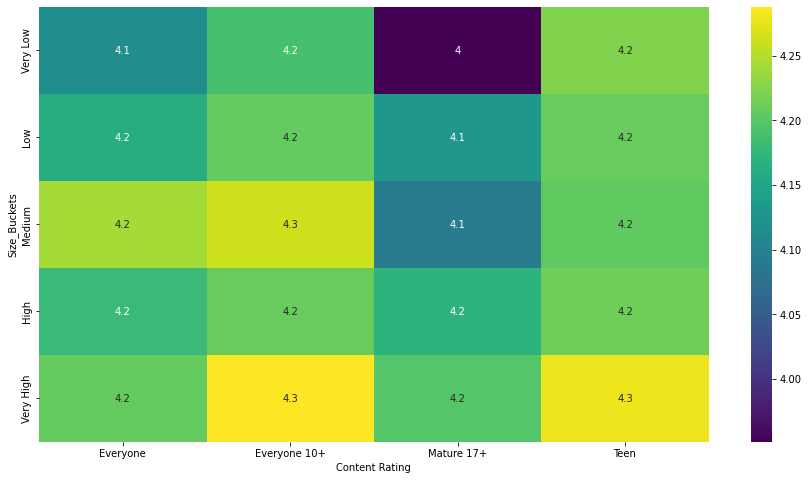

In [60]:
fig=plt.figure(figsize=(15,8))

sns.heatmap(Size_Buckets, cmap='viridis', annot=True)
plt.show()

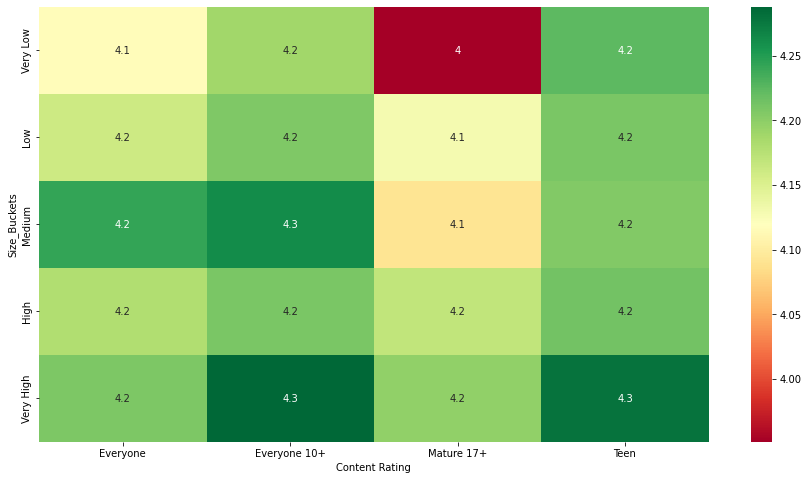

In [61]:
fig=plt.figure(figsize=(15,8))

sns.heatmap(Size_Buckets, cmap='RdYlGn', annot=True)
plt.show()